In [4]:
import sys
import matplotlib.animation
#print matplotlib.animation.writers.list()
print sys.path


#sys.path.insert(0,'/home/jan/cluster/mozaik/')
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
#sys.path.append('/home/jan/cluster/mozaik/contrib/')
#sys.path.append('/home/jan/cluster/mozaik/contrib/PushPullCCLISSOMModelSSIzL23')
#from analysis_and_visualization import perform_analysis_and_visualization
%matplotlib inline

setup_logging()

data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/projects/mozaik/contrib/CorticalStimulation/CorticalStimulationModel_test_____','store_stimuli': False}),replace=True)
                  
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()

#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]

print analog_ids


l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]

                                                

['', '/home/antolikjan/virt_env/mozaik/lib/python2.7', '/home/antolikjan/virt_env/mozaik/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/IPython/extensions', '/home/antolikjan/.ipython']


  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 0.375658035278seconds


[17162 17402 17456 18707 18786 19001 19269 19606 21414 21633 21682 21757
 22207 23806 24969 24970 25202 25628 25791 25921 26764 26944 27352 28590
 29934 32844 33372 34105 36687 38122]


In [9]:
s = data_store.get_segments()[0]

In [13]:
a = s.get_spiketrains()[0]

[] ms


In [2]:
import sys
sys.path.append('/home/antolikjan/projects/mozaik/contrib/')
#from analysis_and_visualization import perform_analysis_and_visualization


In [3]:
l23_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L2/3')[0]
l23_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L2/3')[0]    
        

orr = list(set([MozaikParametrized.idd(s).orientation for s in queries.param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',st_contrast=100).get_stimuli()]))                
        
l4_exc_or_many_analog = numpy.array(analog_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids]) < 0.1)[0]]
l4_inh_or_many_analog = numpy.array(analog_ids_inh)[numpy.nonzero(numpy.array([circular_dist(l4_inh_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids_inh]) < 0.15)[0]]
    
l23_inh_or_many_analog = numpy.array(analog_ids_inh23)[numpy.nonzero(numpy.array([circular_dist(l23_inh_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids_inh23]) < 0.15)[0]]
l23_exc_or_many_analog = numpy.array(analog_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids23]) < 0.1)[0]]
            
    

In [4]:
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()
l4_exc_or_many = numpy.array(spike_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids]) < 0.1)[0]]
idx4 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=l4_exc_or_many)
x = data_store.get_neuron_postions()['V1_Exc_L4'][0][idx4]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1][idx4]
center4 = l4_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.2)[0]]
analog_center4 = set(center4).intersection(analog_ids)


spike_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_spike_train_ids()
l23_exc_or_many = numpy.array(spike_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids23]) < 0.1)[0]]
idx23 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=l23_exc_or_many)
x = data_store.get_neuron_postions()['V1_Exc_L2/3'][0][idx23]
y = data_store.get_neuron_postions()['V1_Exc_L2/3'][1][idx23]
center23 = l23_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.2)[0]]
analog_center23 = set(center23).intersection(analog_ids23)

In [20]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_name='DriftingSinusoidalGratingDisk')
Analog_F0andF1(dsv,ParameterSet({})).analyse()
dsv = param_filter_query(data_store,st_name='InternalStimulus',st_direct_stimulation_name="None")
Analog_MeanSTDAndFanoFactor(dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()
    


INFO:Mozaik:Starting Analog_F0andF1 analysis
  Starting Analog_F0andF1 analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "p

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sh

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":No

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":Non

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None,

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None,

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None,

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Vm'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Inh_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F0_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":N

Analog_F0andF1 analysis took: 102.570131063seconds
INFO:Mozaik:Starting Analog_MeanSTDAndFanoFactor analysis
  Starting Analog_MeanSTDAndFanoFactor analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(ECond)

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_ON', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_ON', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(VM)'}
INF

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_OFF', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_OFF', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ICond)'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'FanoFactor(ECond

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "n

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'Per

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
OperationPNVfromPNVS analysis took: 5.82745695114seconds
INFO:Mozaik:Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "n

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "n

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "n

OperationPNVfromPNVS analysis took: 5.96062994003seconds


In [21]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_name='DriftingSinusoidalGratingDisk')
Analog_MeanSTDAndFanoFactor(dsv,ParameterSet({})).analyse()

INFO:Mozaik:Starting Analog_MeanSTDAndFanoFactor analysis
  Starting Analog_MeanSTDAndFanoFactor analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronV

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronV

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Per

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Per

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Per

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronVal

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronVal

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "n

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronV

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Per

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronV

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronVal

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronVa

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.3333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.26666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuro

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "nam

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.0, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronV

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuro

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.8, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "nam

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.4666666666666666, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.13333333333333333, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'Pe

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.0666666666666667, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'FanoFactor(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Mean(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'P

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":6.000000000002401, "direct_stimulation_name":\'None\', "duration":1029, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.7333333333333334, "size_x":10.0, "size_y":10.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'STD(VM)'}


In [22]:
pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['OperationPNVfromPNVS'],value_name='-(x+y)(F0_Vm,Mean(VM))',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['OperationPNVfromPNVS'],value_name='-(x+y)(F0_Vm,Mean(VM))',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()

In [23]:
pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Exc_Cond',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Exc_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Inh_Cond',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Inh_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Exc_Cond',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Exc_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F1_Inh_Cond',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Inh_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: (x+y),'(x+y)',dsv,ParameterSet({})).analyse()



In [24]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'])
ActionPotentialRemoval(dsv,ParameterSet({'window_length': 5.0})).analyse()
dsv = param_filter_query(data_store,analysis_algorithm='ActionPotentialRemoval')
TrialVariability(data_store,ParameterSet({'vm': True,  'cond_exc': False, 'cond_inh': False})).analyse()
dsv = param_filter_query(data_store,analysis_algorithm='TrialVariability')
AnalogSignal_PerNeuronMeanVar(dsv,{}).analyse()

In [25]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SizeTuningOverview(data_store,ParameterSet({'l4_neurons' : list(center4),'l23_neurons' : list(center23),'l4_neurons_analog' : list(analog_center4),'l23_neurons_analog' : list(analog_center23)}),fig_param={'dpi' : 300,'figsize': (18,8)}).plot()

In [26]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='AnalogSignal_PerNeuronMeanVar',value_name='PerNeuronMean(Vm (no AP) trial-to-trial variance)')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'radius', 'neurons': list(analog_center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (10,15)}).plot()
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='AnalogSignal_PerNeuronMeanVar',value_name='PerNeuronMean(Vm (no AP) trial-to-trial variance)')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'radius', 'neurons': list(analog_center23), 'sheet_name' : 'V1_Exc_L2/3','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (10,15)}).plot()

In [23]:
aff_sampl = numpy.array(data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'aff_samples', sheet_name = 'V1_Exc_L4')[0].get_value_by_id(spike_ids)).flatten()

In [ ]:
selected = numpy.logical_and(aff_sampl > 140, aff_sampl < 160)

In [ ]:
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',st_orientation=[0,numpy.pi/2],st_contrast=[100])    
OverviewPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neuron' : l4_exc, 'sheet_activity' : {}, 'spontaneous' : True}),fig_param={'dpi' : 100,'figsize': (25,12)},plot_file_name="Exc.png").plot({'Vm_plot.y_lim' : (-80,-50),'Conductance_plot.y_lim': (0,30)})

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

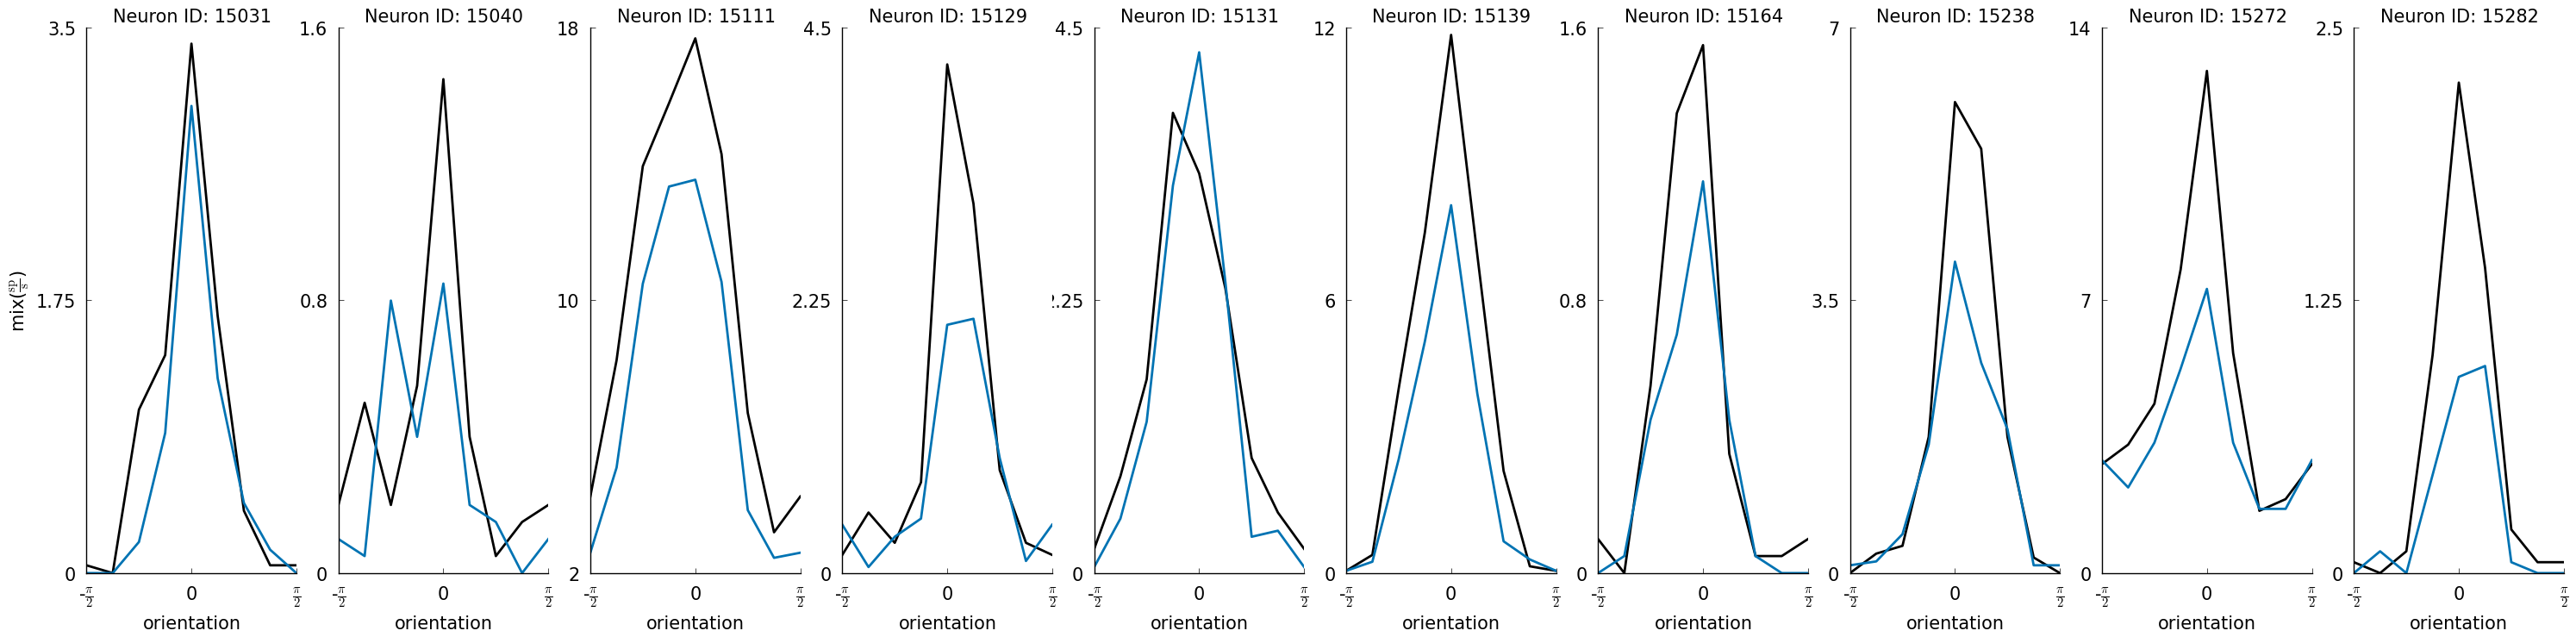

In [5]:
import mozaik.visualization.plotting
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',analysis_algorithm=['TrialAveragedFiringRate'])    
mozaik.visualization.plotting.PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'orientation', 'neurons': list(numpy.array(spike_ids)[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : True,'mean' : False, 'polar' : False, 'pool'  : True}),fig_param={'dpi' : 100,'figsize': (30,7.5)}).plot()


In [5]:
import mozaik.visualization.plotting
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',value_name='(x+y)(F1_Vm,-(x+y)(F0_Vm,Mean(VM)))')    
dsv.print_content()
mozaik.visualization.plotting.PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'radius', 'neurons': list(numpy.array(list(analog_center4))[10:]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False, 'polar' : False, 'pool'  : True}),fig_param={'dpi' : 100,'figsize': (30,7.5)}).plot()


  DSV info:
     Number of recordings: 0
     Number of ADS: 0


IndexError: list index out of range

In [48]:
print numpy.array(list(analog_center4))

[24385 22754 26555 37466 24390 26588 35209 32555 34028 22414 24335 38672
 35698 27507 29812 28238 28630 36691 36719 25212 27066]


SpontActOverview plotting took: 47.3566451073seconds


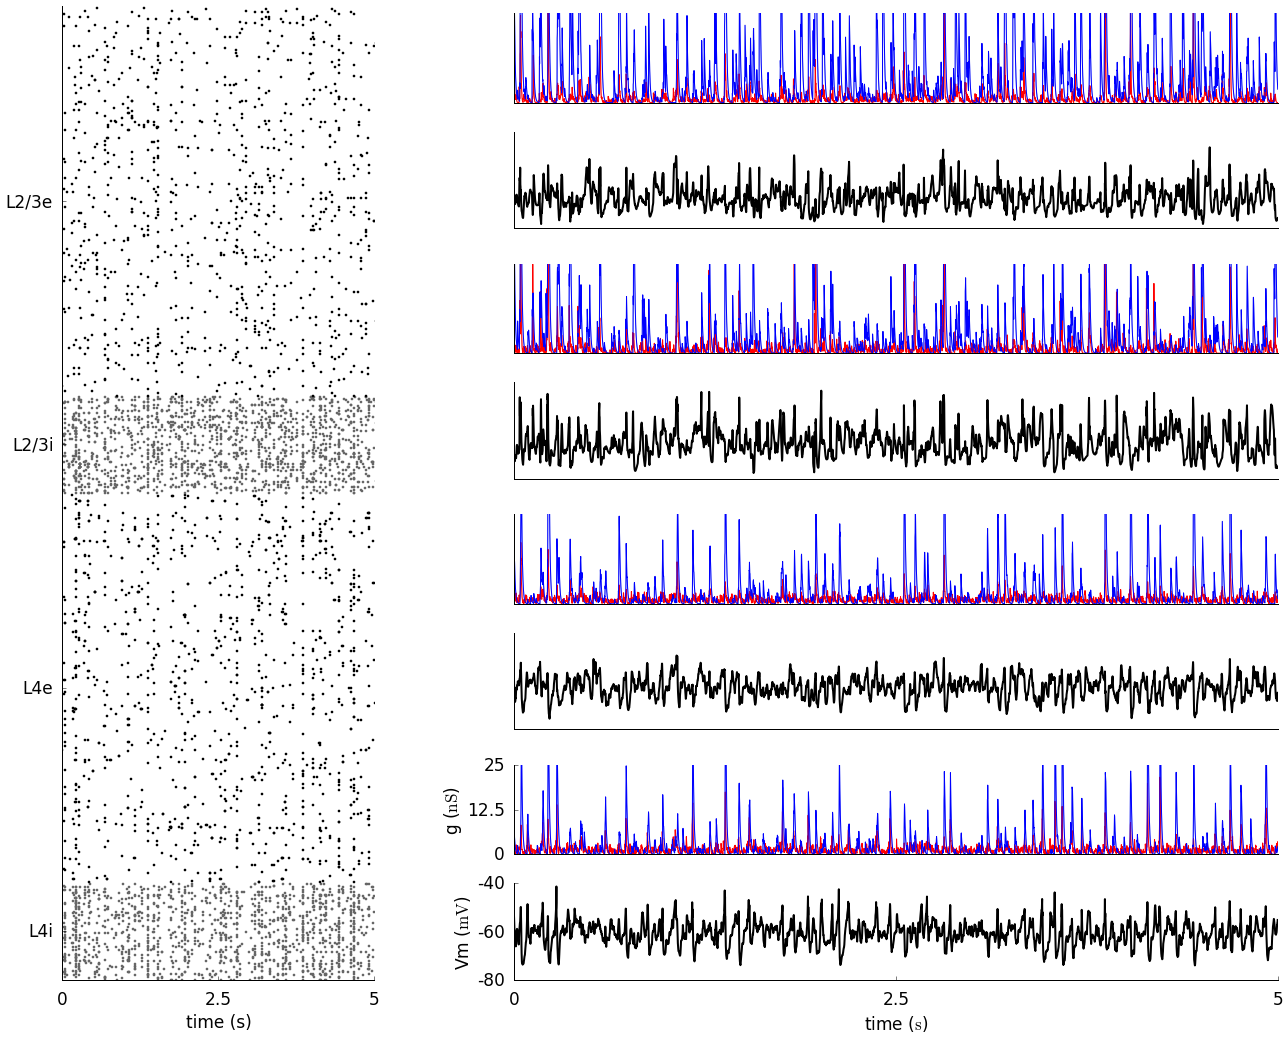

In [4]:
from contrib import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SpontActOverview(data_store,ParameterSet({'l4_exc_neuron' : analog_ids[0], 'l4_inh_neuron' : analog_ids_inh[0],'l23_exc_neuron' : analog_ids23[0],'l23_inh_neuron' : analog_ids_inh23[0]}),plot_file_name='SpontActOverview.png', fig_param={'dpi' : 200,'figsize': (18,14.5)}).plot()

  mean_firing_rate_L4E :0.667905780989
  mean_firing_rate_L4I :2.90448433259
  mean_firing_rate_L23E :0.161194191591
  mean_firing_rate_L23I :0.688141278611
  mean_CV_L4E :1.1737626626
  mean_CV_L4I :1.08695329119
  mean_CV_L23E :0.886991426574
  mean_CV_L23I :0.897669013149
  mean_CC_L4E :0.00794114249825
  mean_CC_L4I :0.0862893023615
  mean_CC_L23E :0.00681313505936
  mean_CC_L23I :0.170166461827
  mean_VM_L4E :-66.6948995318
  mean_VM_L4I :-64.0038805211
  mean_VM_L23E :-67.8190487079
  mean_VM_L23I :-66.3654804178
  mean_ECond :0.00248449417216
  mean_ICond :0.00502473319731
SpontStatisticsOverview plotting took: 88.0089941025seconds


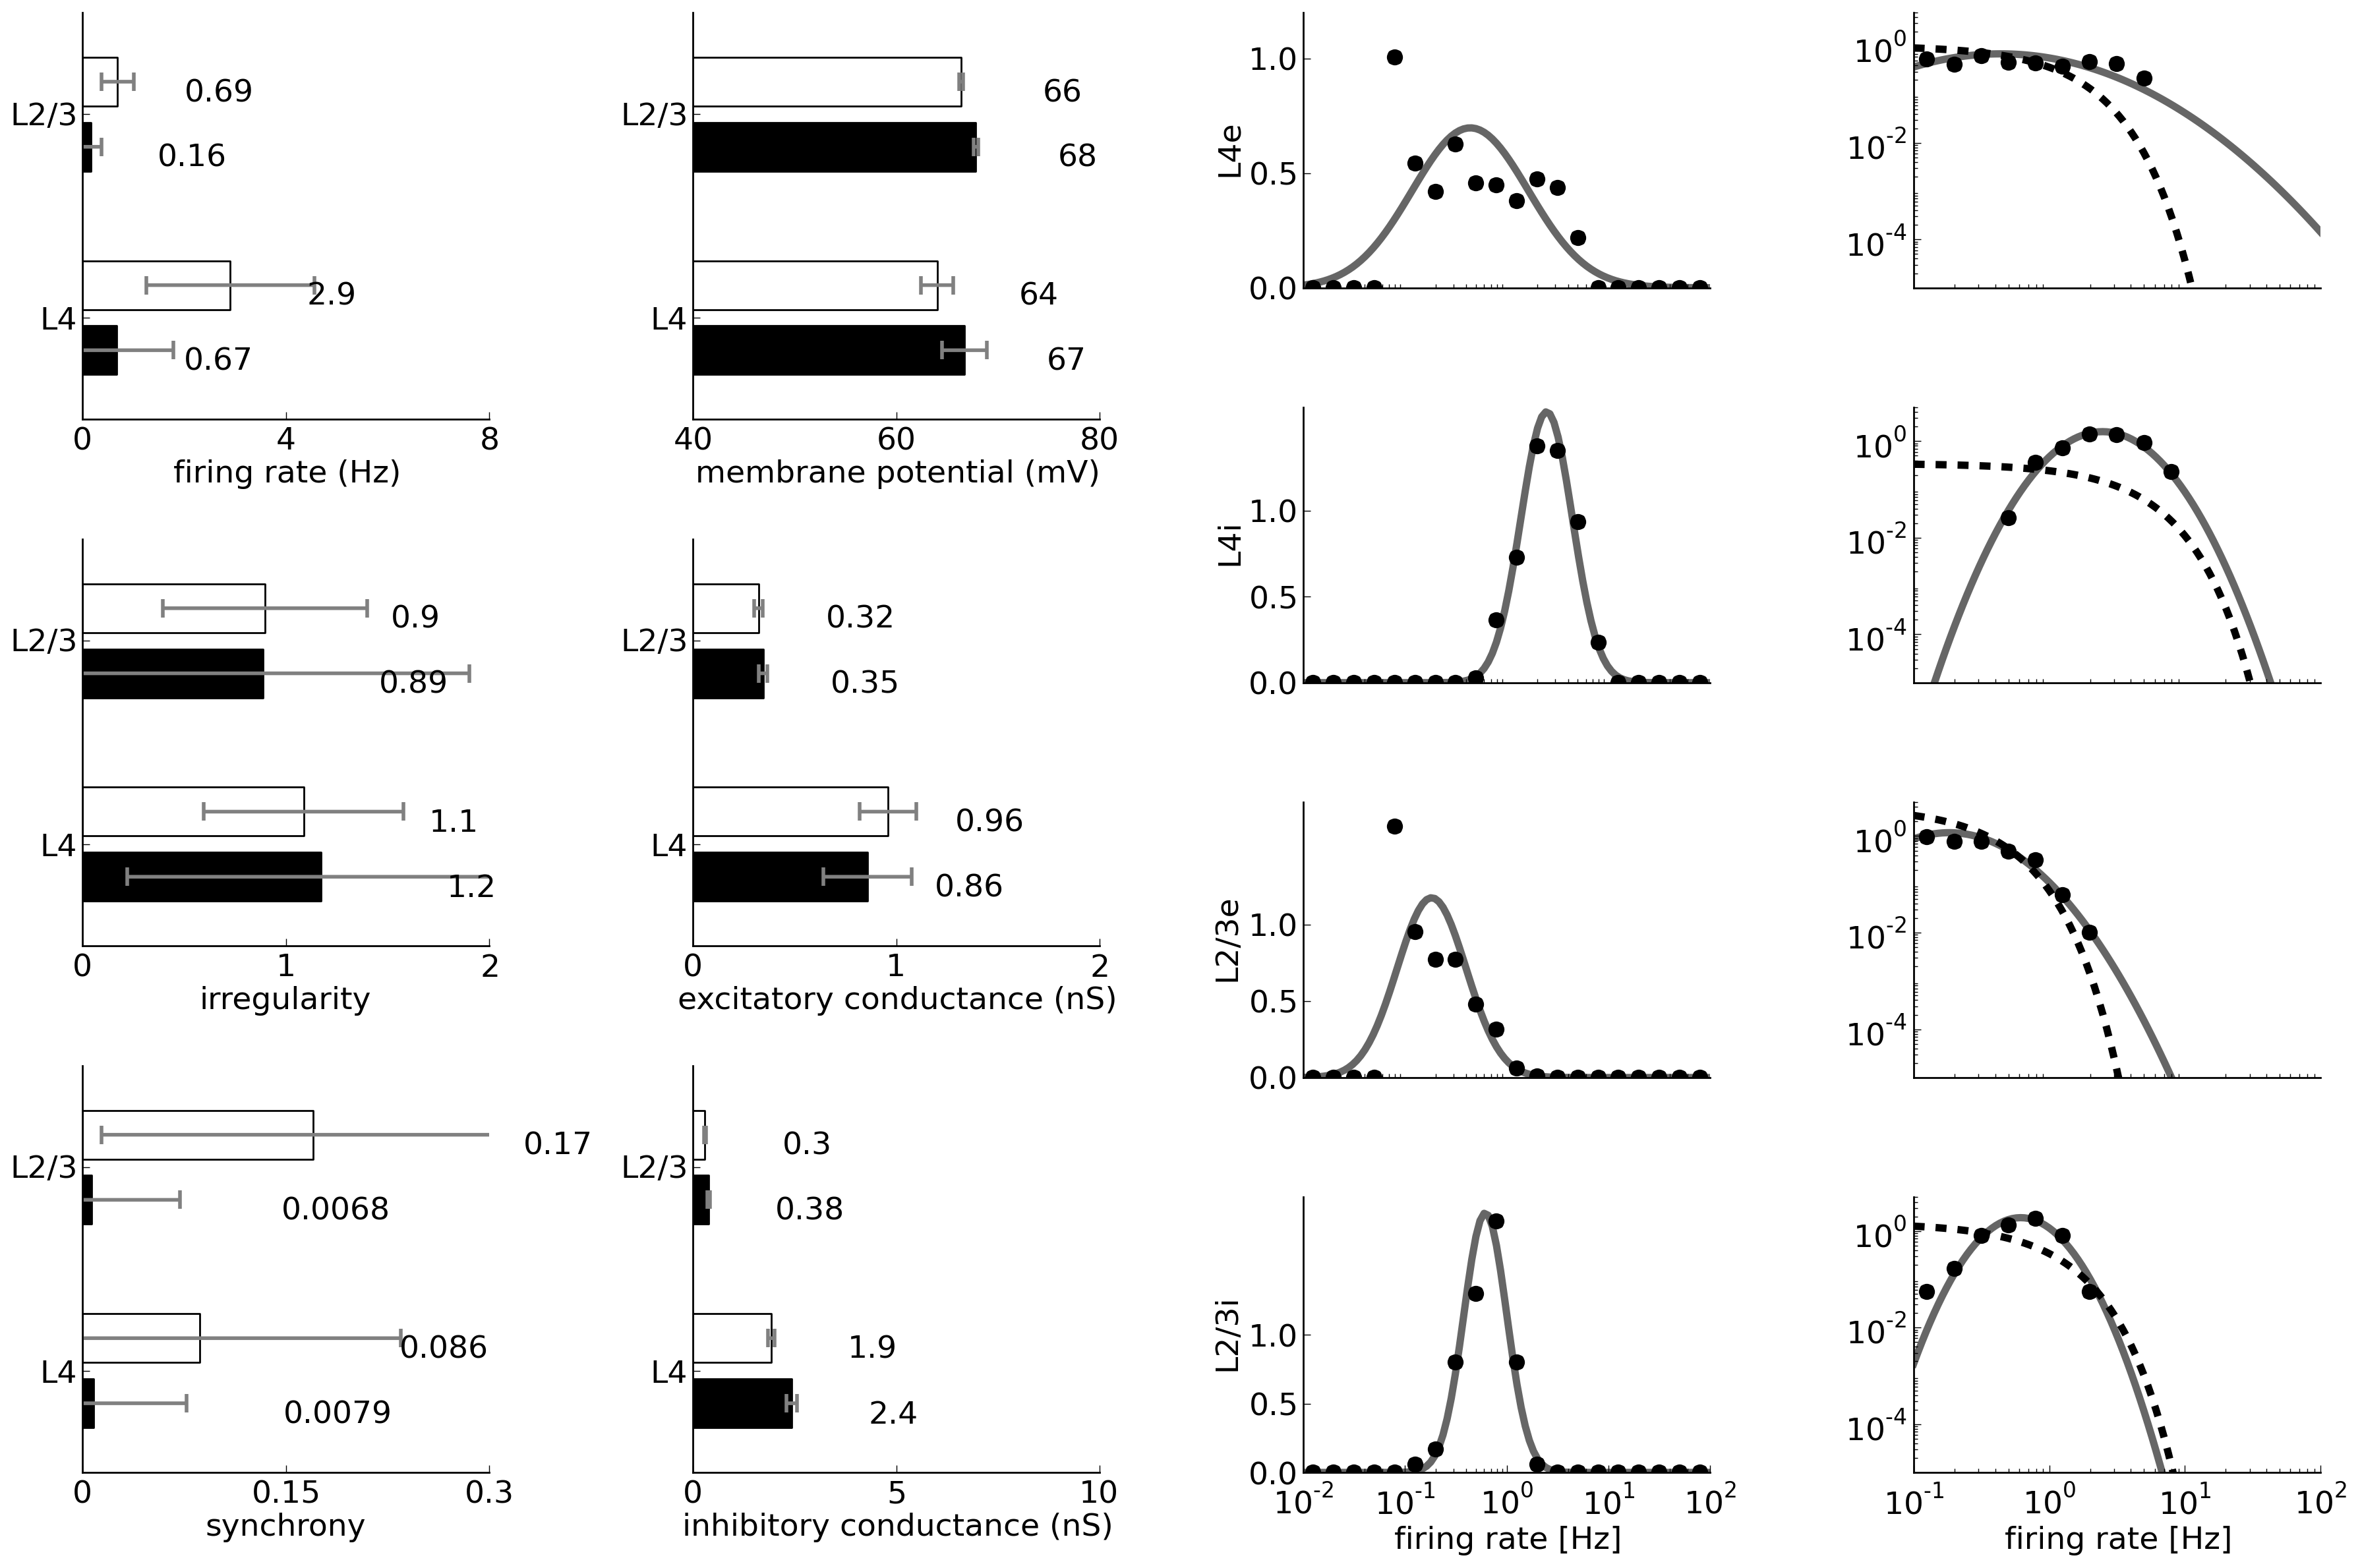

In [6]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SpontStatisticsOverview(data_store,ParameterSet({}), fig_param={'dpi' : 200,'figsize': (18,12)},plot_file_name='SpontStatisticsOverview.png').plot()

LSV1MReponseOverview plotting took: 49.5263450146seconds


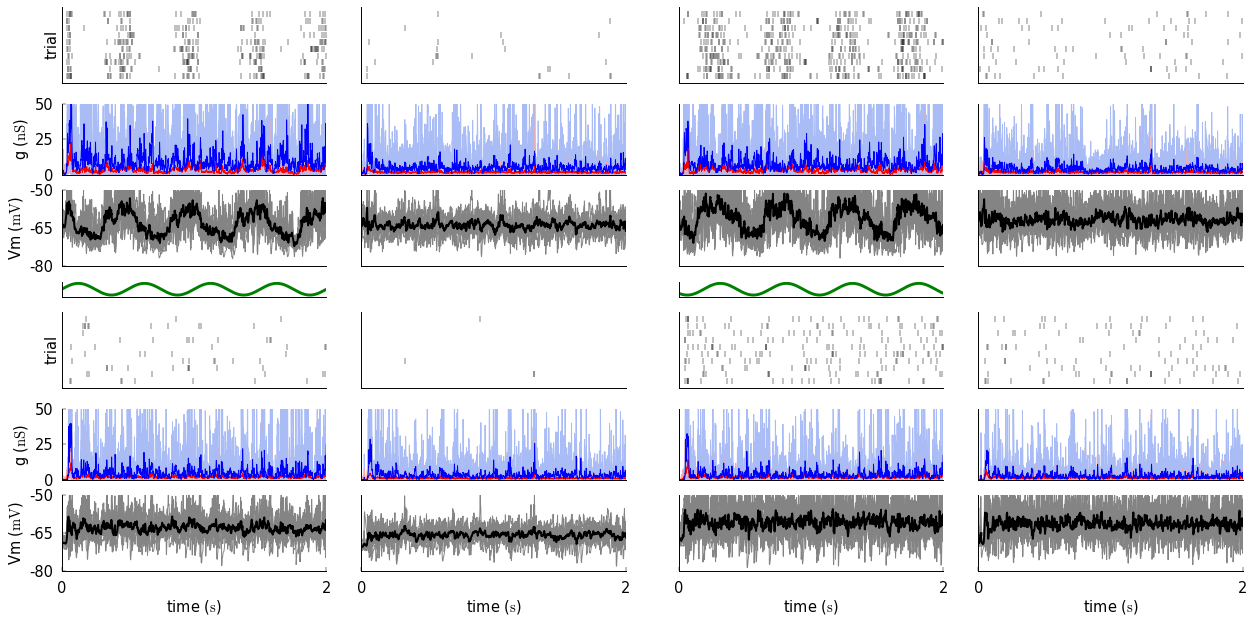

In [7]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.LSV1MReponseOverview(data_store,ParameterSet({'l4_exc_neuron' : l4_exc_or_many_analog[1], 'l4_inh_neuron' : l4_inh_or_many_analog[1],'l23_exc_neuron' : l23_exc_or_many_analog[1], 'l23_inh_neuron' : l23_inh_or_many_analog[0]}),fig_param={'dpi' : 70,'figsize': (18,9)},plot_file_name='SingleCellOverview.png').plot({'*.x_ticks':[0,2.0], "*.title" : None,'*.Vm_plot.y_lim' : (-80,-50),'*.Conductance_plot.y_lim' : (0,50)})

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'color': (0, 0, 0), 'linestyle': '--', 'label': 'spont.'}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'color': (0, 0, 0), 'linestyle': '--', 'label': 'spont.'}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'color': (0, 0, 0), 'linestyle': '--', 'label': 'spont.'}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'color': (0, 0, 0), 'linestyle': '--', 'label': 'spont.'}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '

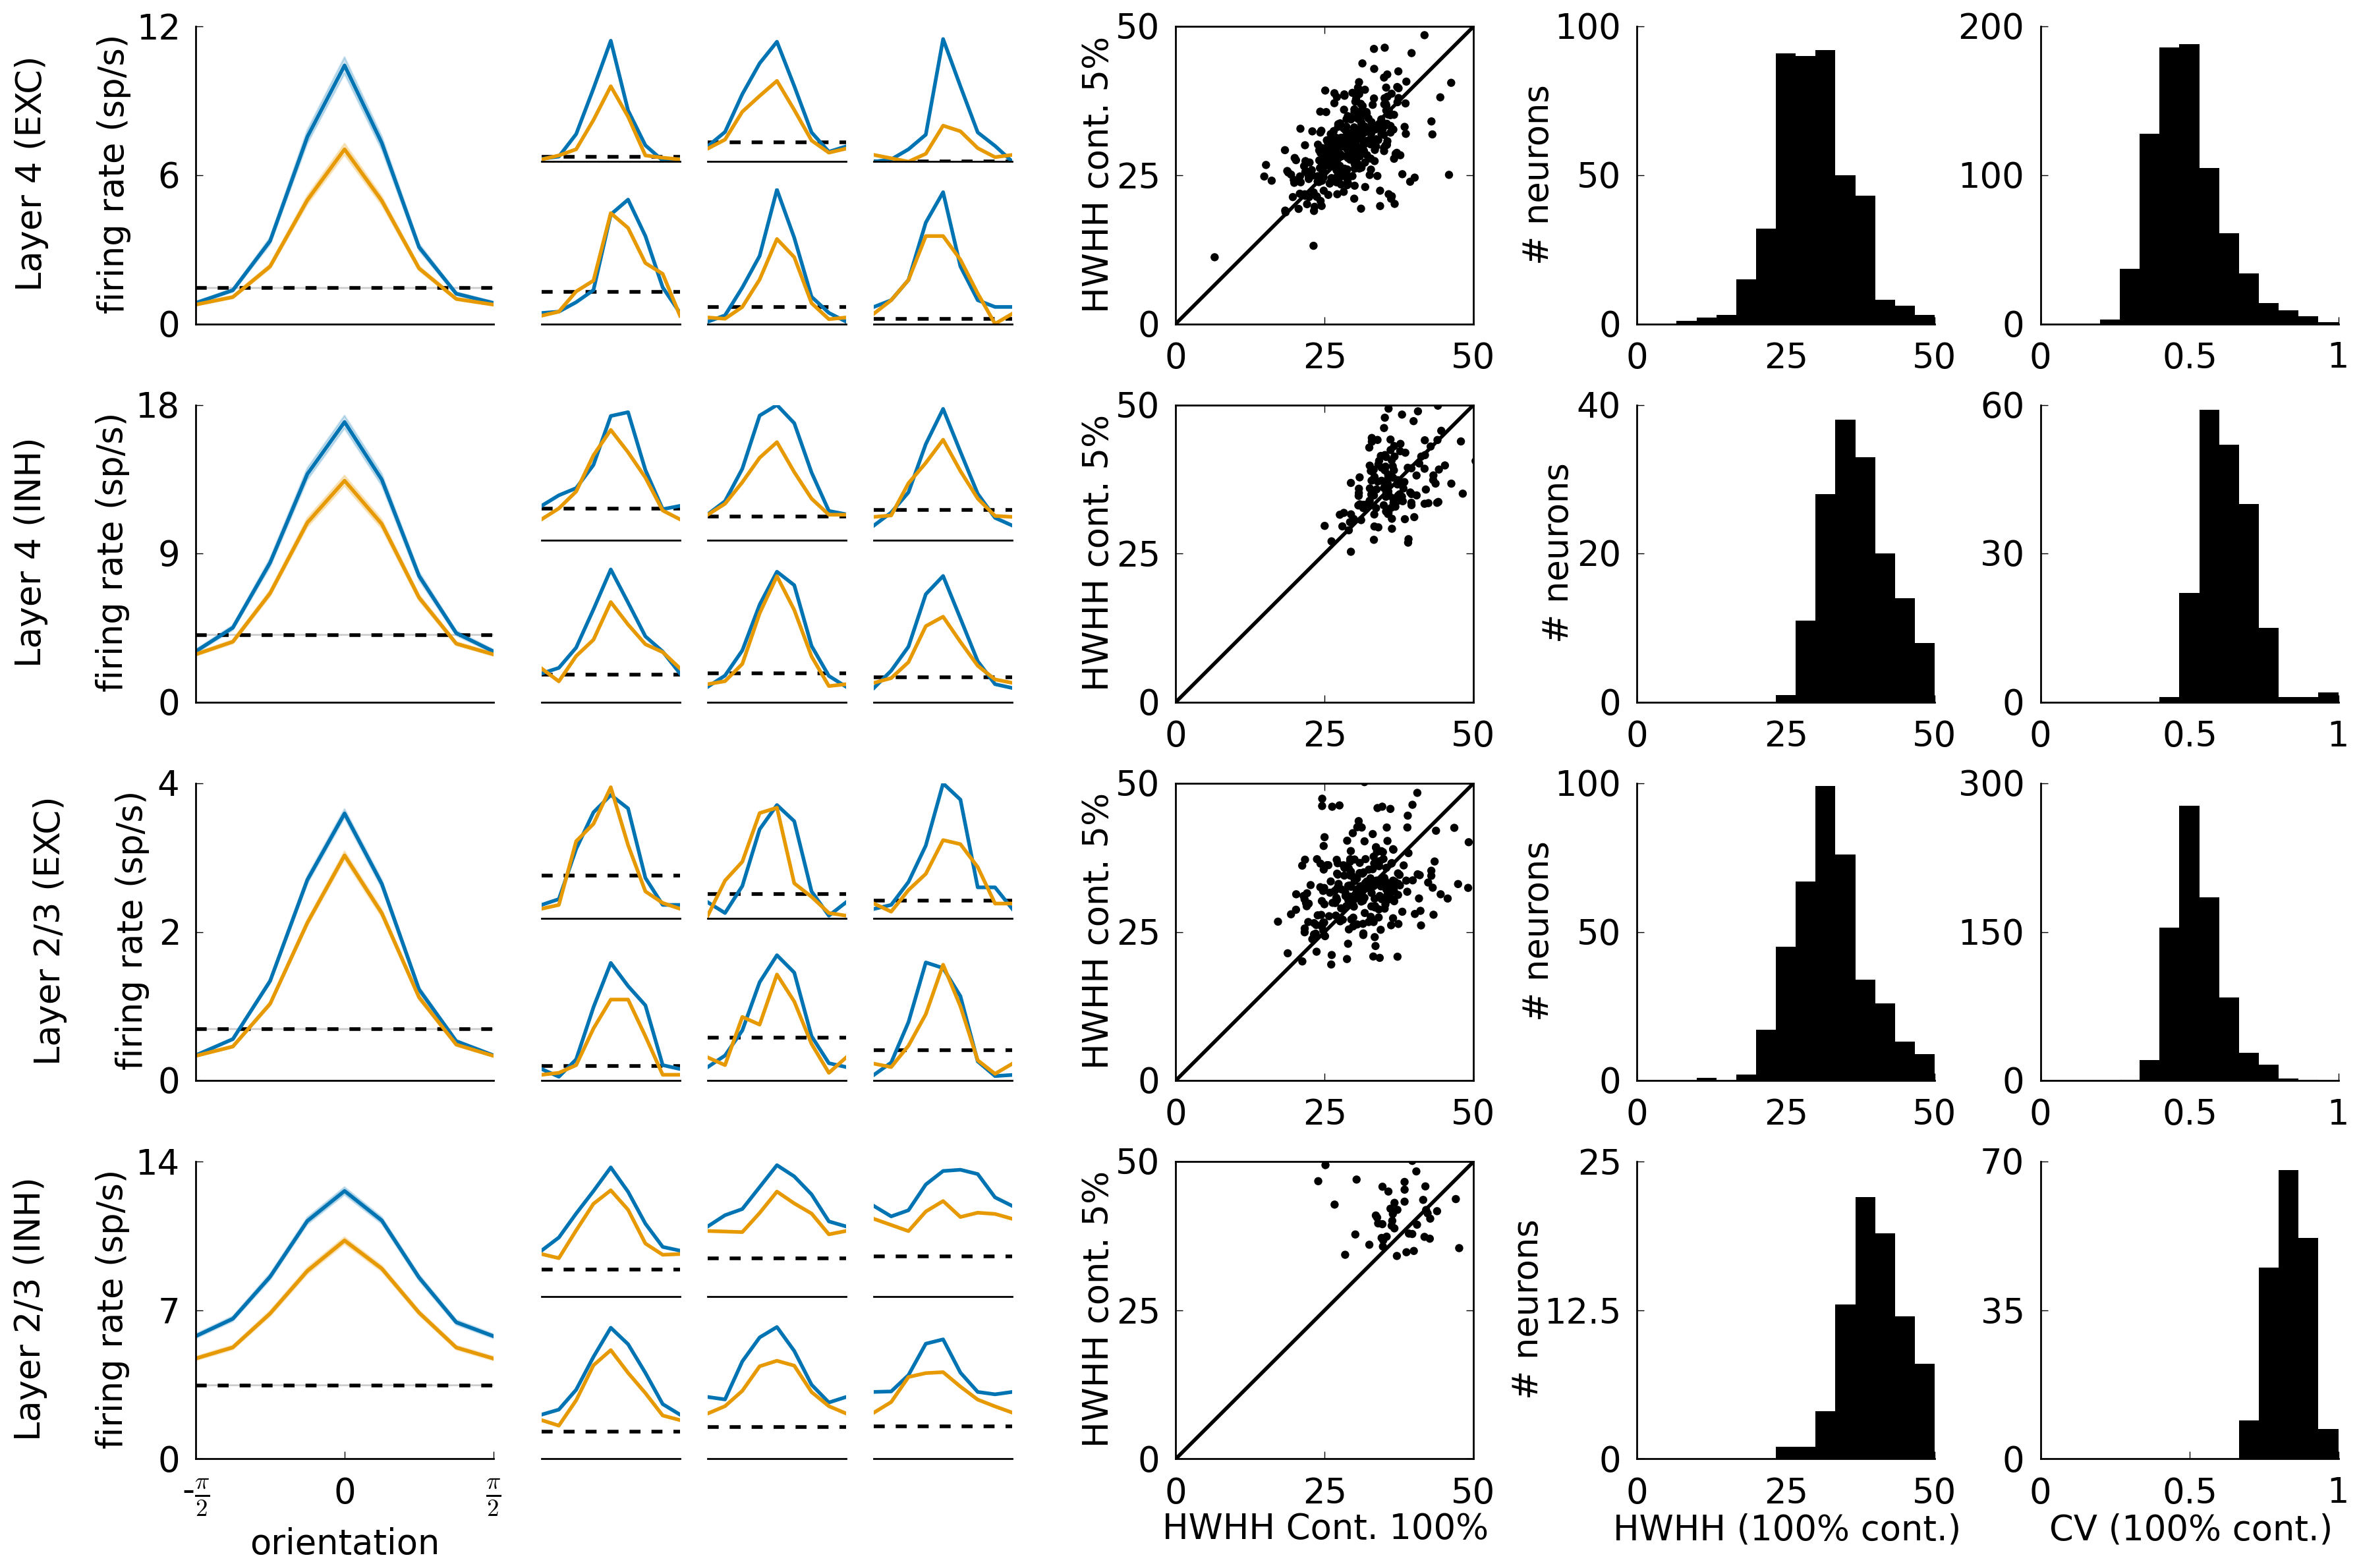

In [5]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.OrientationTuningSummaryFiringRates(data_store,ParameterSet({'exc_sheet_name1': 'V1_Exc_L4','inh_sheet_name1': 'V1_Inh_L4','exc_sheet_name2': 'V1_Exc_L2/3','inh_sheet_name2': 'V1_Inh_L2/3'}),fig_param={'dpi' : 200,'figsize': (18,12)},plot_file_name='OrientationTuningSummary.png').plot({'*.fontsize' : 19})            

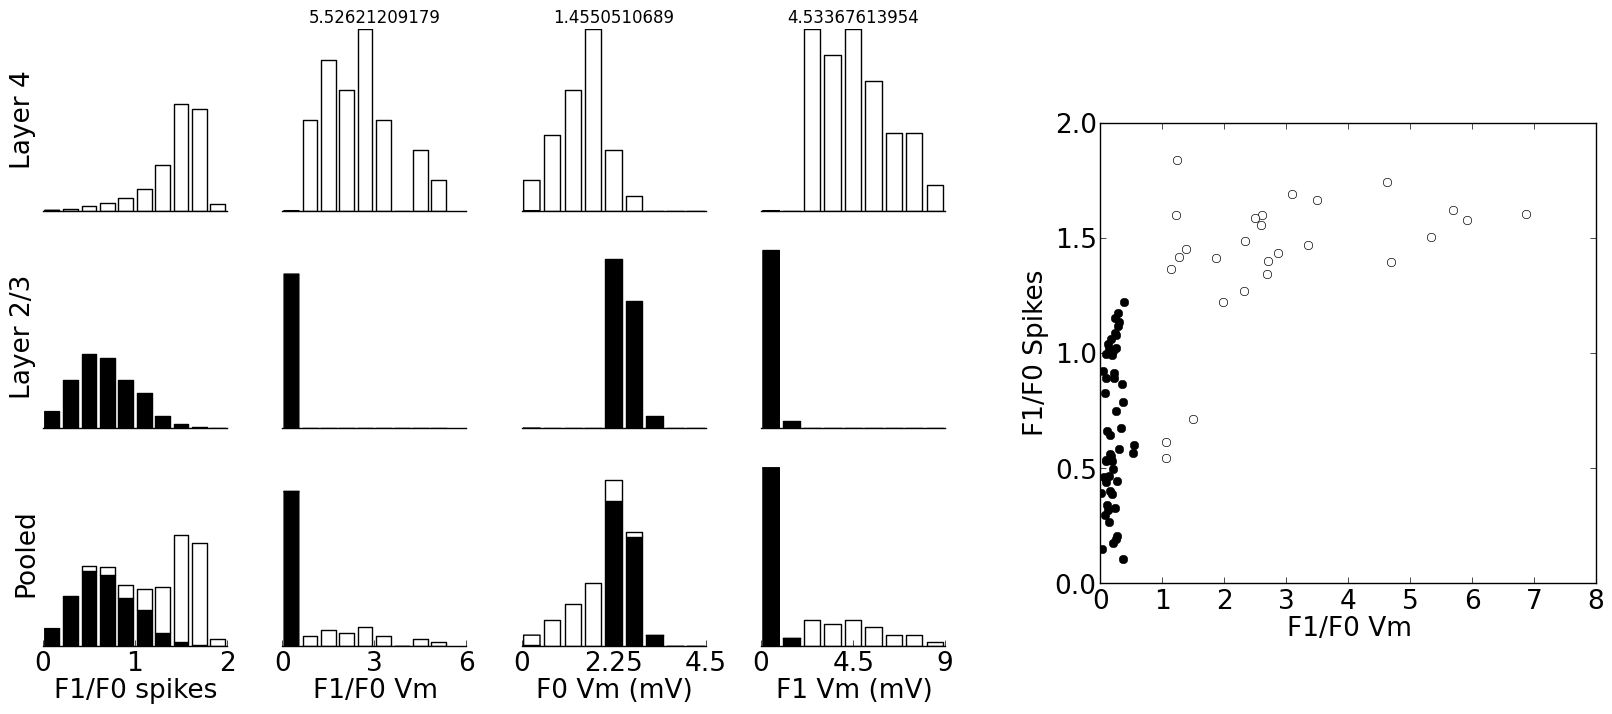

In [10]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.MRfig(param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_contrast=[100],st_name='FullfieldDriftingSinusoidalGrating'),ParameterSet({'SimpleSheetName' : 'V1_Exc_L4','ComplexSheetName' : 'V1_Exc_L2/3'}),plot_file_name='MR.png',fig_param={'dpi' : 100,'figsize': (18,7.7)}).plot()

In [7]:
print numpy.mean(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,analysis_algorithm='CircularVarianceOfTuningCurve',ads_unique=True).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,sheet_name='V1_Inh_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,analysis_algorithm='CircularVarianceOfTuningCurve',ads_unique=True).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,sheet_name='V1_Exc_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,analysis_algorithm='CircularVarianceOfTuningCurve',ads_unique=True).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,sheet_name='V1_Inh_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,analysis_algorithm='CircularVarianceOfTuningCurve',ads_unique=True).get_analysis_result()[0].values)


0.420074490429
0.592856323775
0.541513872054
0.580020733561


In [39]:
import mozaik.analysis.analysis
reload(mozaik.analysis.analysis)
pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['TrialAveragedFiringRate'],value_name='Firing rate',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='V1_Exc_L4',analysis_algorithm=['TrialAveragedFiringRate'],value_name='Firing rate')
mozaik.analysis.analysis.SubtractPNVfromPNVS(pnv,dsv,ParameterSet({})).analyse()

  Starting SubtractPNVfromPNVS analysis
SubtractPNVfromPNVS analysis took: 5.60384583473seconds


PlotTuningCurve plotting took: 0.179639101028seconds


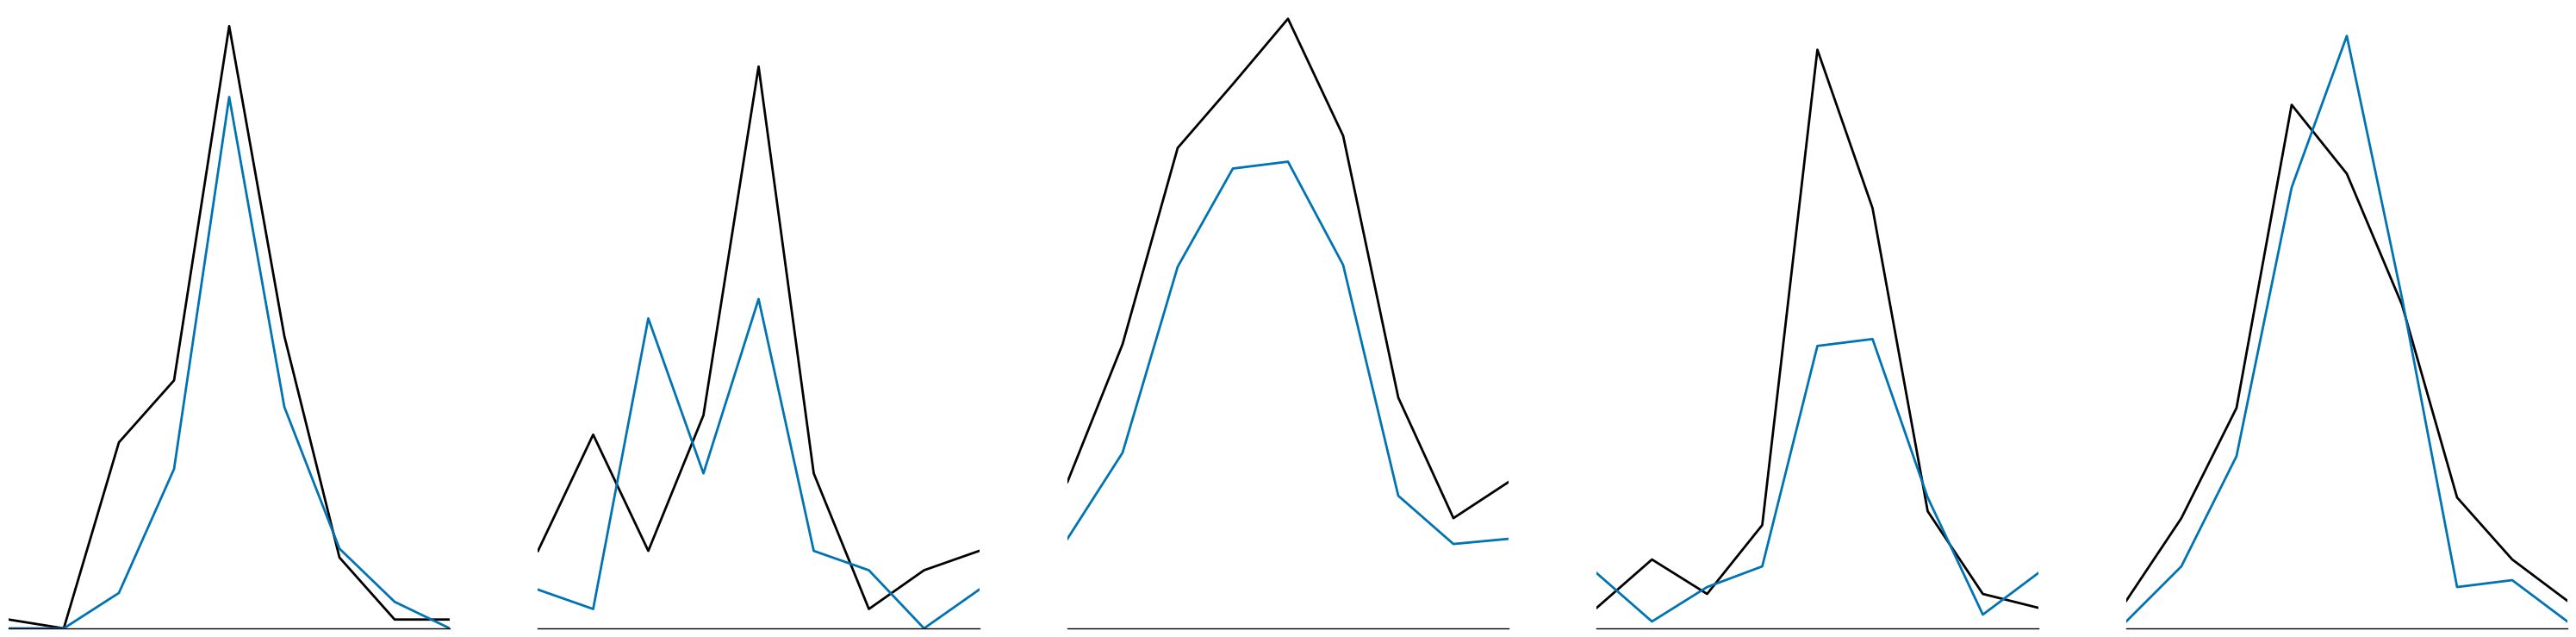

In [19]:
import mozaik.visualization.plotting
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',analysis_algorithm=['TrialAveragedFiringRate'],value_name='Firing rate')    
mozaik.visualization.plotting.PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'orientation', 'neurons': list(numpy.array(spike_ids)[:5]), 'sheet_name' : 'V1_Exc_L4','centered'  : True,'mean' : False, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (30,7.5)}).plot({'*.y_lim' : (0,None),'*.title' : None,'*.left_border' : None, '*.y_axis' : None,'*.x_axis' : False, '*.linestyles' : ['-','-']})


In [61]:
import mozaik.analysis.analysis
reload(mozaik.analysis.analysis)

dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='Firing rate',sheet_name=['V1_Exc_L4','V1_Inh_L4','V1_Exc_L2/3','V1_Inh_L2/3'])    
mozaik.analysis.analysis.GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()

dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',analysis_algorithm='SubtractPNVfromPNVS',value_name='Firing rate-Firing rate',sheet_name=['V1_Exc_L4','V1_Inh_L4','V1_Exc_L2/3','V1_Inh_L2/3'])    
mozaik.analysis.analysis.GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()
        

  Starting GaussianTuningCurveFit analysis


GaussianTuningCurveFit analysis took: 14.1415941715seconds
  Starting GaussianTuningCurveFit analysis


GaussianTuningCurveFit analysis took: 5.98633980751seconds


In [9]:
mmax5 = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
mmax100 = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
responsive_spike_ids_l4E = numpy.array(spike_ids)[numpy.logical_and(numpy.array(mmax5) > 1.0,numpy.array(mmax100) > 1.0)]

mmax5 = param_filter_query(data_store,sheet_name='V1_Inh_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh)
mmax100 = param_filter_query(data_store,sheet_name='V1_Inh_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh)
responsive_spike_ids_l4I = numpy.array(spike_ids_inh)[numpy.logical_and(numpy.array(mmax5) > 1.0,numpy.array(mmax100) > 1.0)]

mmax5 = param_filter_query(data_store,sheet_name='V1_Exc_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids23)
mmax100 = param_filter_query(data_store,sheet_name='V1_Exc_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids23)
responsive_spike_ids_l23E = numpy.array(spike_ids23)[numpy.logical_and(numpy.array(mmax5) > 1.0,numpy.array(mmax100) > 1.0)]

mmax5 = param_filter_query(data_store,sheet_name='V1_Inh_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh23)
mmax100 = param_filter_query(data_store,sheet_name='V1_Inh_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh23)
responsive_spike_ids_l23I = numpy.array(spike_ids_inh23)[numpy.logical_and(numpy.array(mmax5) > 1.0,numpy.array(mmax100) > 1.0)]



In [10]:
mmax5 = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
mmax100 = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
responsive_spike_ids_l4E = numpy.array(spike_ids)[numpy.logical_and(numpy.array(mmax5) > 1.0,numpy.array(mmax100) > 1.0)]

print param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E)
print param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E)


[17.623838691428549, 16.21163962876933, 8.1101621806406925, 12.770926054568328, 17.813923769078812, 20.441302623524283, 17.374744927245604, 15.115872132962288, 9.3709387655250556, 8.2774803414005191, 19.637249185541876, 12.50961991506683, 12.139598206757571, 18.883167983021625, 10.315570672910466, 14.224638498947455, 10.476743847518254, 12.592653545073979, 21.293759372422958, 12.181043738270901, 24.090119577800078, 15.586526943195269, 12.58612148724696, 10.640194516339731, 11.312606999944336, 14.016039978529713, 19.599672233535543, 9.6153547470886505, 24.896832514110862, 10.371103247800686, 13.108730236224275, 8.1194575833334586, 16.55643384075136, 20.265299792486026, 16.525921237025283, 14.153042988373127, 15.385367413398523, 11.000852137672007, 16.60416032209206, 18.548729792604451, 12.219587757319905, 13.785226852331727, 17.6790006907767, 12.49706292462931, 19.017194078329993, 17.476611222454828, 10.055949175273721, 15.548456923486714, 12.701759786912275, 13.230304511002984, 11.0829

In [28]:
print len(spike_ids)
print len(responsive_spike_ids_l4E)

293
290


In [19]:
responsive_spike_ids_l4E = spike_ids
responsive_spike_ids_l4I = spike_ids_inh
responsive_spike_ids_l23E = spike_ids23
responsive_spike_ids_l23I = spike_ids_inh23

In [70]:
base = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
mmax = param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
hwhh_hc = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate-Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids))
hwhh_lc = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate-Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids))

print base
print mmax
print numpy.array(base)+numpy.array(mmax)

[0.0, -1.0, 2.4475524475524475, -1.0, 0.049950049950049945, 0.049950049950049945, -1.0, -1.0, -1.0, -1.0, 1.2487512487512487, 0.0, 0.0, 0.049950049950049945, 0.0, -1.0, 0.0, 0.049950049950049945, -1.0, 0.0, -1.0, -1.0, 0.84915084915084882, -1.0, 1.3486513486513485, -1.0, 0.0, 0.0, -1.0, -1.0, 0.54945054945054939, 0.44955044955044948, 0.24975024975024973, -1.0, 0.54945054945054927, -1.0, 0.0, -1.0, 0.54945054945054939, -1.0, -1.0, -1.0, 0.0, -1.0, 0.89910089910089896, -1.0, 0.049950049950049945, -1.0, 0.14985014985014983, 0.09990009990009989, 0.14985014985014983, 0.29970029970029965, -1.0, -1.0, 0.44955044955044948, -1.0, 0.39960039960039956, 0.24975024975024973, 1.9980019980019983, -1.0, -1.0, -1.0, 1.3986013986013983, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.59940059940059931, -1.0, 0.0, 0.74925074925074908, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.29970029970029965, 0.0, 0.29970029970029965, 0.0, 2.5474525474525471, -1.0, 0.0, 0.0, -1.0, -1.0, 0.44955044955044

771
286


In [71]:
responsive_spike_ids_l4E = numpy.array(spike_ids)[numpy.logical_and(numpy.array(base)+numpy.array(mmax) > 2.0,hwhh_hc>0,hwhh_lc>0)]
a = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E))
b = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E))
print a
print numpy.mean(a[a<100])
print numpy.mean(abs(a-b)[abs(a-b)<1000])


a = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate-Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E))
b = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate-Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E))
print a
print numpy.mean(a[a<100])
print numpy.mean(abs(a-b)[abs(a-b)<1000])


#a = numpy.array(param_filter_query(data_store,sheet_name='V1_Inh_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4I))
#b = numpy.array(param_filter_query(data_store,sheet_name='V1_Inh_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4I))
#print numpy.mean(a[a<1000])
#print numpy.mean((a-b)[abs(a-b)<1000])
#a = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l23E))
#b = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l23E))
#print numpy.mean(a[a<1000])
#print numpy.mean((a-b)[abs(a-b)<1000])
#a = numpy.array(param_filter_query(data_store,sheet_name='V1_Inh_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l23I))
#b = numpy.array(param_filter_query(data_store,sheet_name='V1_Inh_L2/3',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l23I))
#print numpy.mean(a[a<1000])
#print numpy.mean((a-b)[abs(a-b)<1000])




[ 38.0890254   31.28293109  41.57510004  23.26020325  23.06541114
  28.38267732  27.95563577  38.63875652  32.79266735  33.82807151
  32.2662471   34.26763615  28.06438417  24.29645636  20.66425281
  26.71812672  29.46357839  29.50971034  34.67661949  32.28056342
  40.00573564  18.65937432  30.88920471  32.82542188  27.7901265
  34.70562707  29.82098867  20.41688233  31.85454524  27.43640567
  29.22539569  27.27151959  26.83898756  28.89634893  34.23972006
  25.76320293  28.63423716  27.10684427  39.96353873  27.68786599
  19.71102848  21.95789624  30.36985425  22.43376318  32.40347385
  28.06044649  39.78213151  33.02347828  30.75031328  35.90634921
  27.88355159  29.32862819  39.89531748  21.00420964  30.66798976
  30.94877445  19.39959242  31.43448314  25.65614995  32.52324949
  30.32163123  24.26196133  27.27225904  27.80943666  29.2175863
  33.92305104  30.88070879  37.43058642  34.51321055  33.25890684
  26.73984691  32.98619988  32.36390507  29.20577934 -67.46062376
  32.3642907

In [15]:
a = numpy.array(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name="None",st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids_l4E))
max(a)

56.021253037184472

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_

  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None

  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'color': (0, 0.45, 0.7), 'linestyle': '-', 'label': 'contrast : 100'}
  {'color': (0.9, 0.6, 0), 'linestyle': '-', 'label': 'contrast : 5'}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None

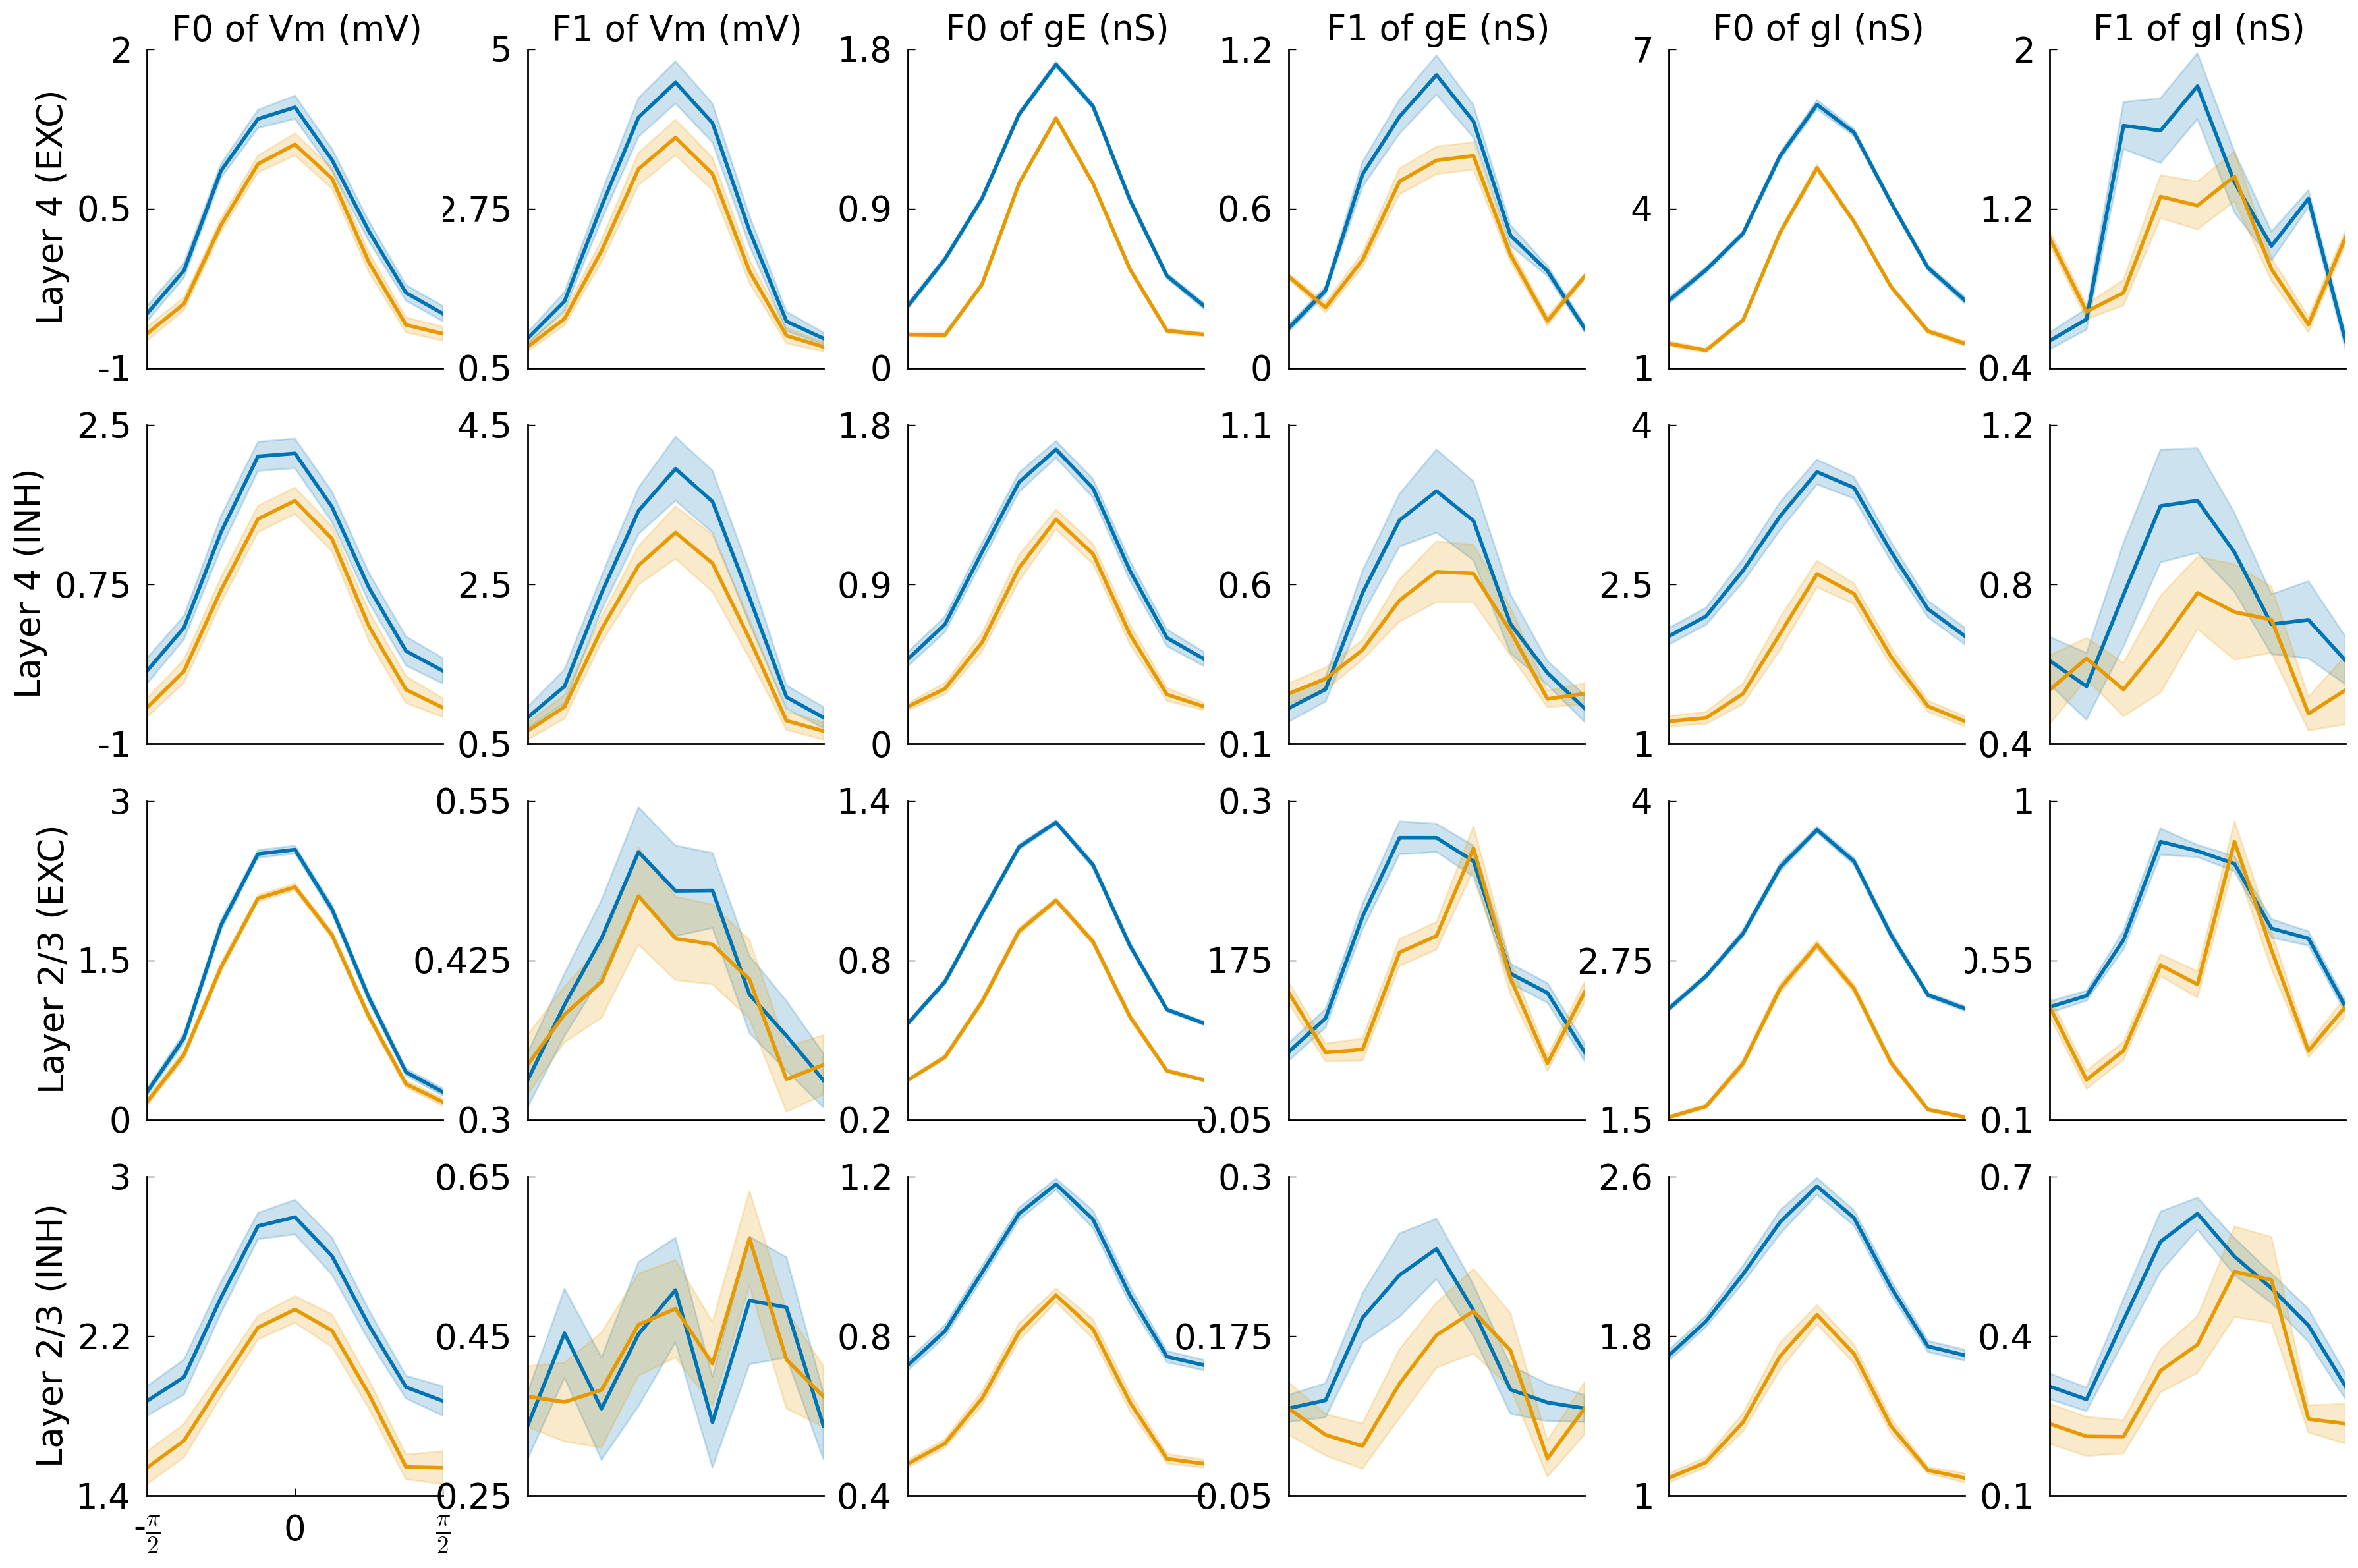

In [7]:
import lsv1m_paper
reload(lsv1m_paper)


lsv1m_paper.OrientationTuningSummaryAnalogSignals(data_store,ParameterSet({'exc_sheet_name1': 'V1_Exc_L4','inh_sheet_name1': 'V1_Inh_L4','exc_sheet_name2': 'V1_Exc_L2/3','inh_sheet_name2': 'V1_Inh_L2/3'}),fig_param={'dpi' : 200,'figsize': (18,12)},plot_file_name='OrientationTuningSummaryAnalogSignals.png').plot({'*.fontsize' : 19,'*.colors': [(0, 0.45, 0.7),(0.9, 0.6, 0)]})            

In [ ]:
lsv1m_paper.TrialToTrialVariabilityComparison(data_store,ParameterSet({'sheet_name1' : 'V1_Exc_L4','sheet_name2' : 'V1_Exc_L2/3','data_dg' : 0.93 , 'data_ni' : 1.19}),fig_param={'dpi' : 200,'figsize': (15,7.5)},plot_file_name='TrialToTrialVariabilityComparison.png').plot()

StimulusResponseComparison plotting took: 16.7197220325seconds


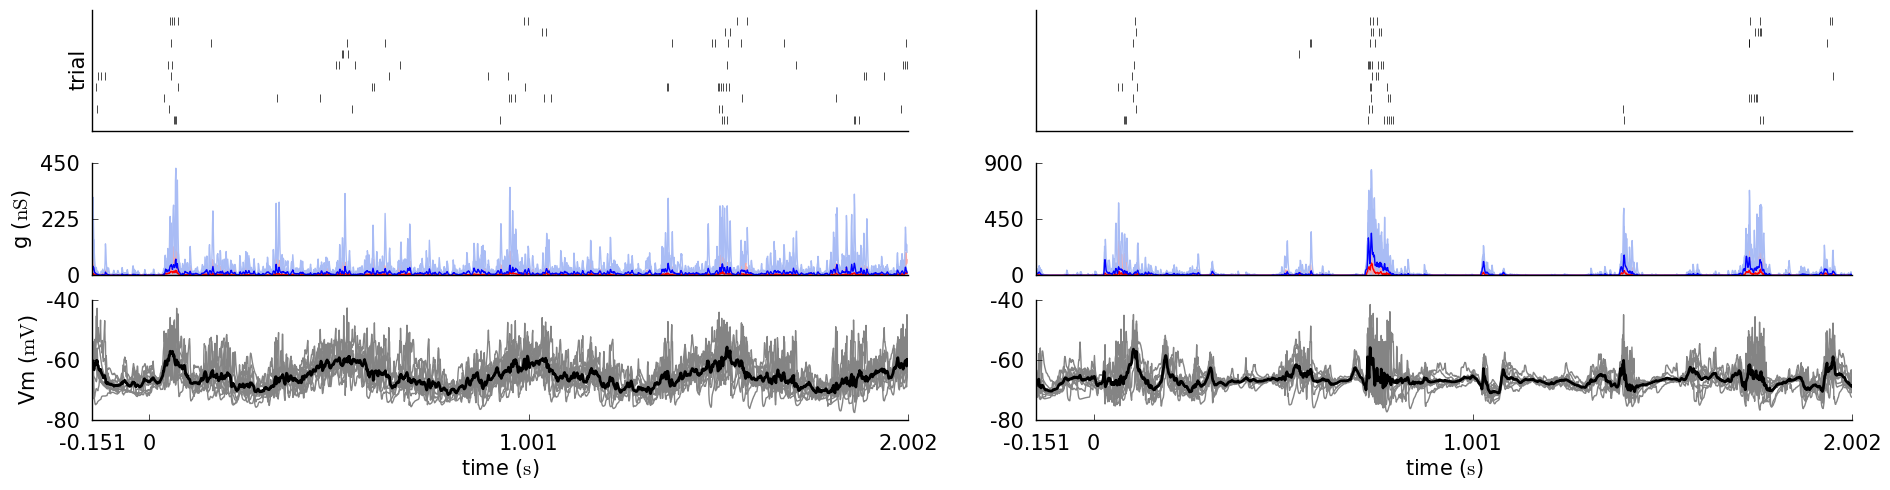

In [17]:
reload(lsv1m_paper)
lsv1m_paper.StimulusResponseComparison(data_store,ParameterSet({'neuron' : l4_exc_or_many_analog[0],'sheet_name' : 'V1_Exc_L4'}),fig_param={'dpi' : 100,'figsize': (19,5)},plot_file_name='StimulusResponseComparison1.png').plot()

OverviewPlot plotting took: 4.4033138752seconds


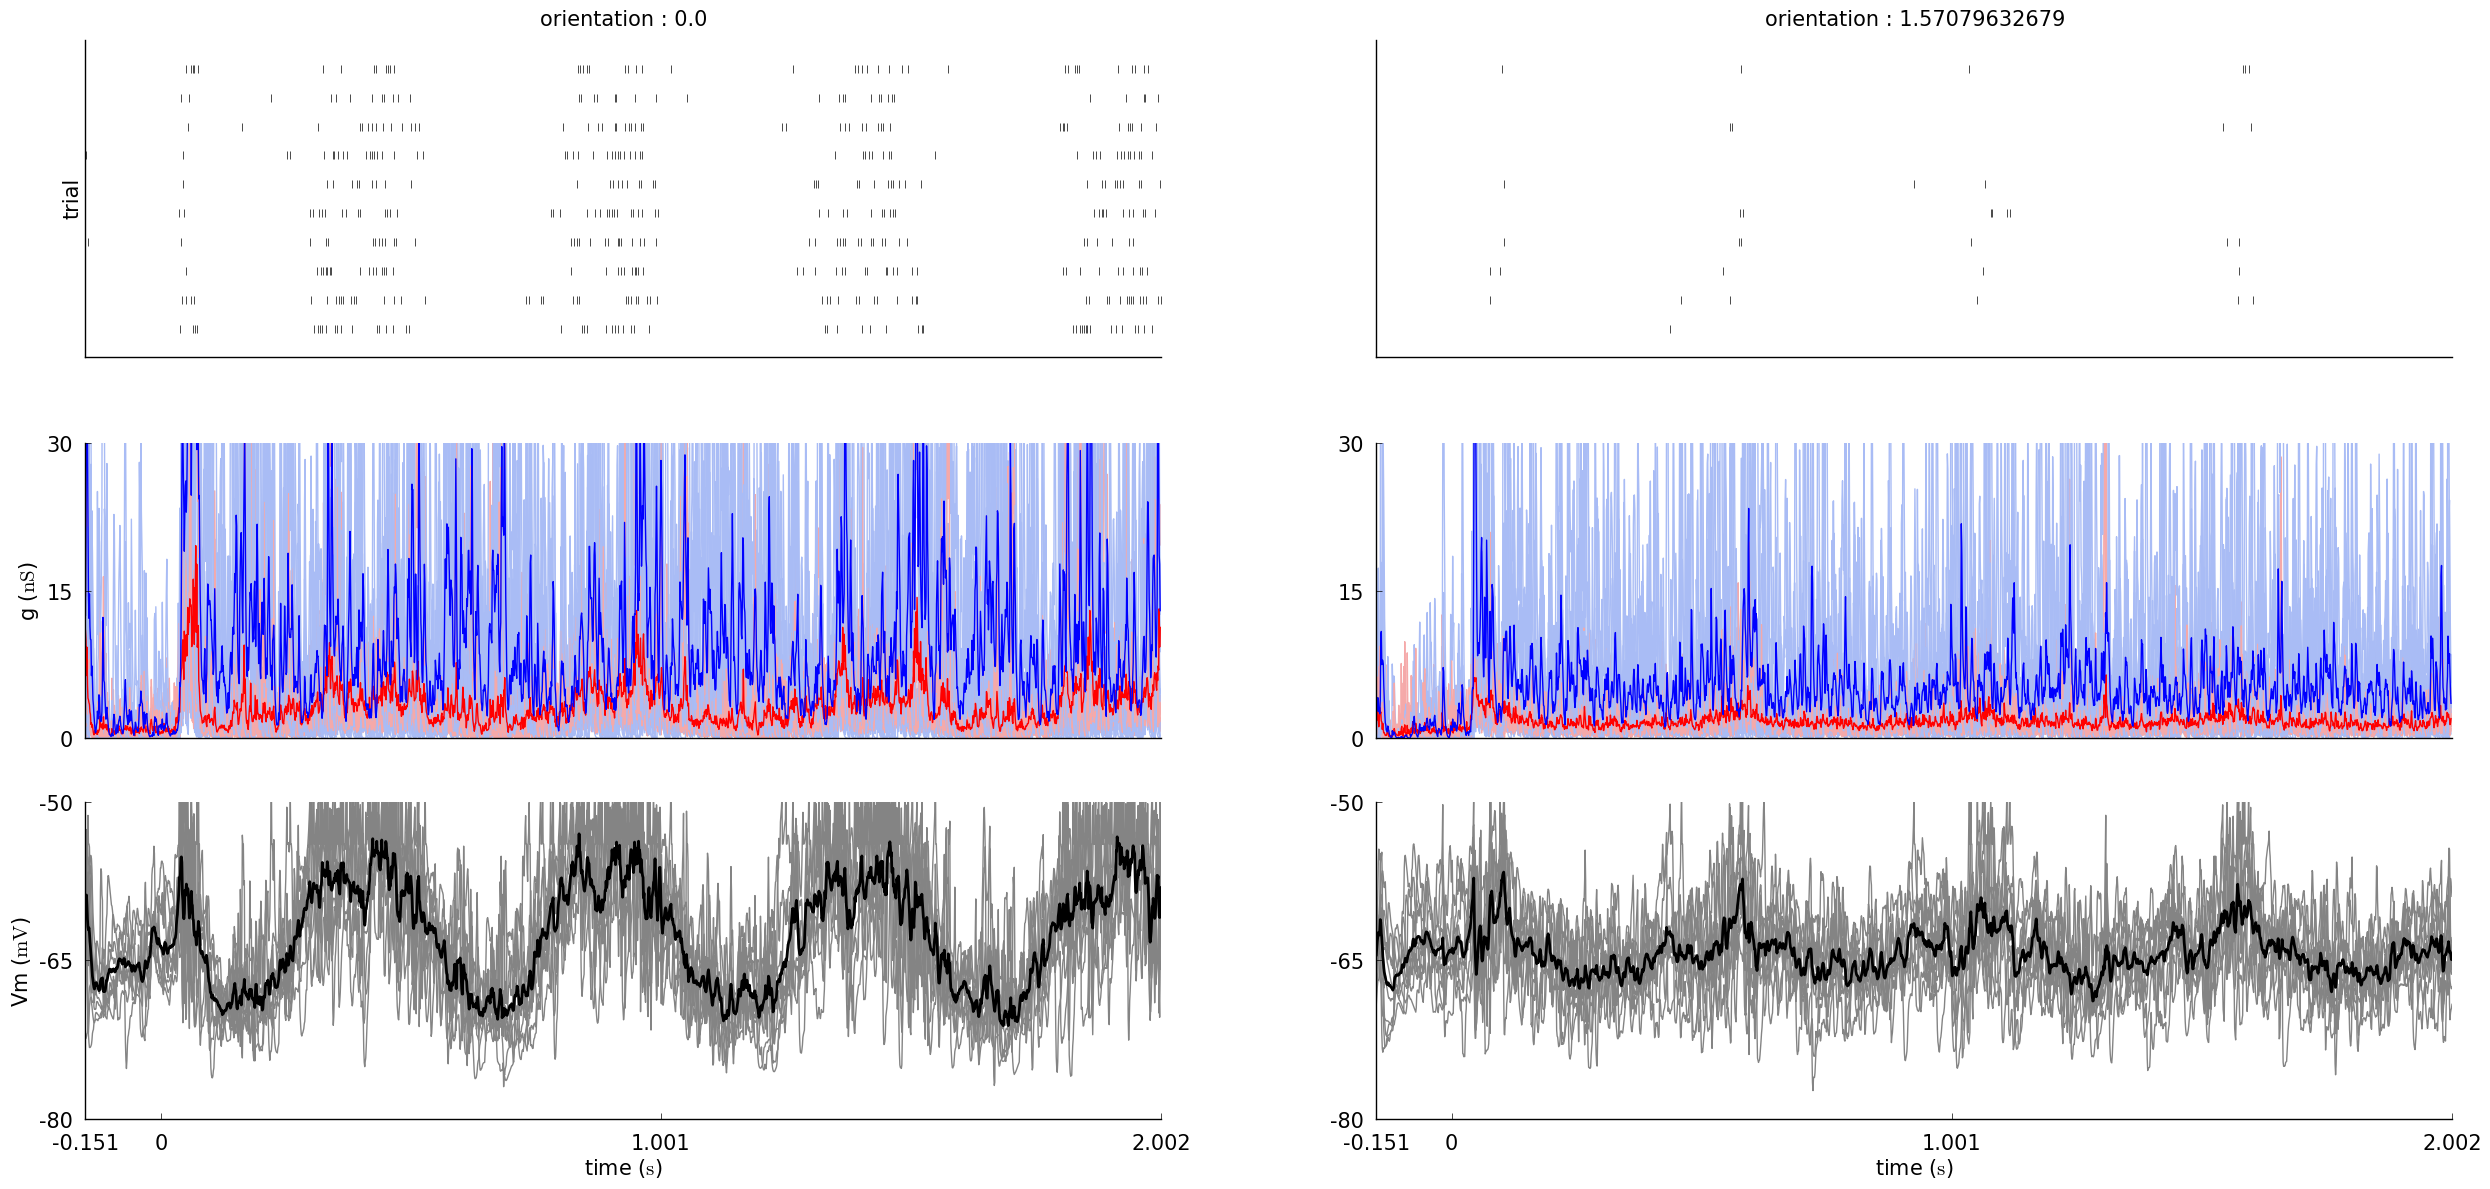

In [37]:
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',st_orientation=[0,numpy.pi/2],st_contrast=[100])    
OverviewPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neuron' : l4_exc, 'sheet_activity' : {}, 'spontaneous' : True}),fig_param={'dpi' : 100,'figsize': (25,12)},plot_file_name="Exc.png").plot({'Vm_plot.y_lim' : (-80,-50),'Conductance_plot.y_lim': (0,30)})
            

In [ ]:
print numpy.mean(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=100).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=5).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=100).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=5).get_analysis_result()[0].values)


print scipy.stats.sem(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=100).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=5).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=100).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=5).get_analysis_result()[0].values)

print numpy.mean(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=100).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=100).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=5).get_analysis_result()[0].values)
print numpy.mean(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=5).get_analysis_result()[0].values)


print scipy.stats.sem(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=100).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=100).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L4',st_contrast=5).get_analysis_result()[0].values)
print scipy.stats.sem(param_filter_query(data_store,value_name=['Max. facilitation radius of Firing rate'],sheet_name='V1_Exc_L2/3',st_contrast=5).get_analysis_result()[0].values)